In [5]:
from datahandler import DataHandler
from trader import Products

In [19]:
products = [Products.VOLCANIC_ROCK, Products.VOLCANIC_ROCK_VOUCHER_9500, Products.VOLCANIC_ROCK_VOUCHER_9750, Products.VOLCANIC_ROCK_VOUCHER_10000, Products.VOLCANIC_ROCK_VOUCHER_10250, Products.VOLCANIC_ROCK_VOUCHER_10500]

In [6]:
dh = DataHandler("/home/zr/code/imc-prosperity-3/.venv/lib/python3.12/site-packages/prosperity3bt/resources/round3")
dh.load_csv_files()
df = dh.get_combined_dataframes()
print(df.head())


data = {product: df[df['product'] == product] for product in products}

   day  timestamp                      product  bid_price_1  bid_volume_1  \
0    0          0  VOLCANIC_ROCK_VOUCHER_10500         99.0          19.0   
1    0          0                      DJEMBES      13493.0          72.0   
2    0          0                   CROISSANTS       4321.0         111.0   
3    0          0                         JAMS       6631.0         210.0   
4    0          0  VOLCANIC_ROCK_VOUCHER_10000        505.0          19.0   

   bid_price_2  bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  \
0          NaN           NaN          NaN           NaN          100   
1          NaN           NaN          NaN           NaN        13494   
2          NaN           NaN          NaN           NaN         4322   
3          NaN           NaN          NaN           NaN         6633   
4          NaN           NaN          NaN           NaN          506   

   ask_volume_1  ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  \
0            19          NaN   

In [8]:
assert len(data) == len(products)

In [9]:
data[Products.VOLCANIC_ROCK]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss,index
13,0,0,VOLCANIC_ROCK,10502.0,205.0,NaN,NaN,NaN,NaN,10504,146,10505.0,59.0,NaN,NaN,10503.0,0.0,2000000
21,0,100,VOLCANIC_ROCK,10509.0,192.0,NaN,NaN,NaN,NaN,10511,122,10512.0,70.0,NaN,NaN,10510.0,0.0,2000100
31,0,200,VOLCANIC_ROCK,10512.0,167.0,NaN,NaN,NaN,NaN,10514,109,10515.0,58.0,NaN,NaN,10513.0,0.0,2000200
55,0,300,VOLCANIC_ROCK,10517.0,118.0,10516.0,68.0,NaN,NaN,10518,118,10519.0,68.0,NaN,NaN,10517.5,0.0,2000300
60,0,400,VOLCANIC_ROCK,10509.0,128.0,10508.0,73.0,NaN,NaN,10510,128,10511.0,73.0,NaN,NaN,10509.5,0.0,2000400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839936,2,999500,VOLCANIC_ROCK,10167.0,110.0,10166.0,51.0,NaN,NaN,10169,156,NaN,NaN,NaN,NaN,10168.0,0.0,4999500
839945,2,999600,VOLCANIC_ROCK,10166.0,161.0,NaN,NaN,NaN,NaN,10168,101,10169.0,60.0,NaN,NaN,10167.0,0.0,4999600
839965,2,999700,VOLCANIC_ROCK,10166.0,143.0,10165.0,51.0,NaN,NaN,10168,194,NaN,NaN,NaN,NaN,10167.0,0.0,4999700
839984,2,999800,VOLCANIC_ROCK,10167.0,119.0,10166.0,57.0,NaN,NaN,10168,119,10169.0,57.0,NaN,NaN,10167.5,0.0,4999800


Let's have a look at the daa visually

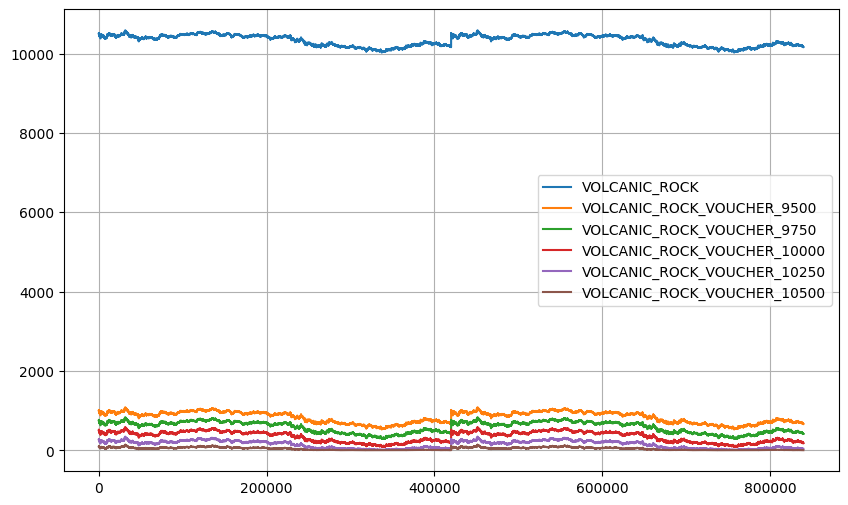

In [20]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
for product in products:
    ax1.plot(data[product]["mid_price"], label=product)
    
plt.legend()
plt.grid(True)  # Optionally add a grid
plt.show()


Let's remove the underlying and look at the options

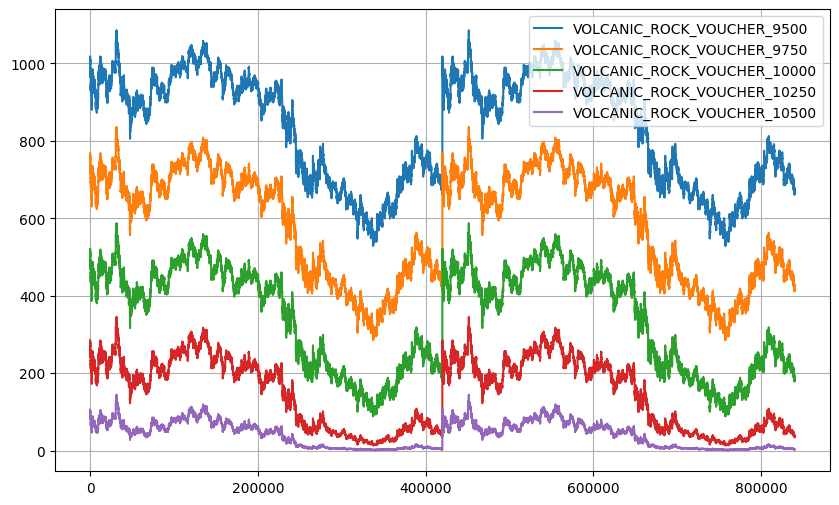

In [48]:
import matplotlib.pyplot as plt

options = [product for product in products if product != Products.VOLCANIC_ROCK]

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
for product in options:
    ax1.plot(data[product]["mid_price"], label=product)
    

plt.legend()
plt.grid(True)  # Optionally add a grid
plt.show()

They all looks the same just sort of translated up or down a little

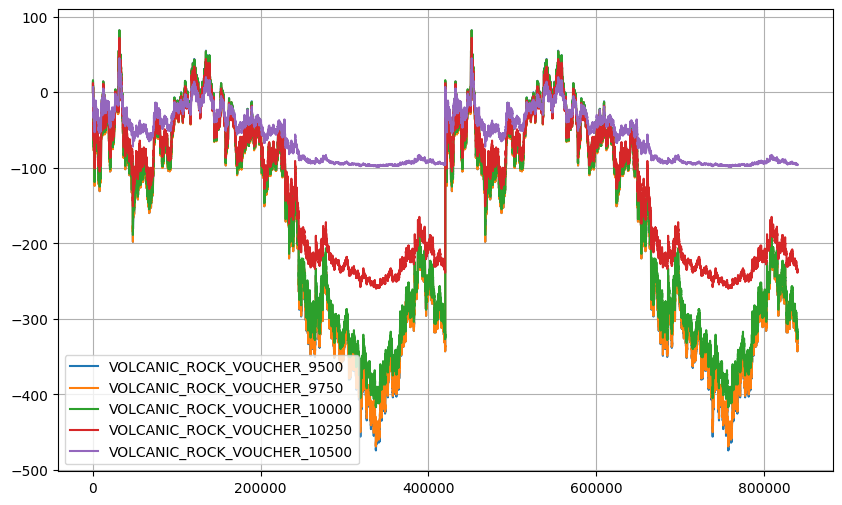

In [51]:
import matplotlib.pyplot as plt

options = [product for product in products if product != Products.VOLCANIC_ROCK]

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
for product in options:
    product_data = data[product]
    d = product_data["mid_price"] - product_data["mid_price"].iloc[0]
    ax1.plot(d , label=product)
    
plt.legend()
plt.grid(True)  # Optionally add a grid
plt.show()

Overlapping the different options you can see that they all still look the same but they all look like they're scaled vertically

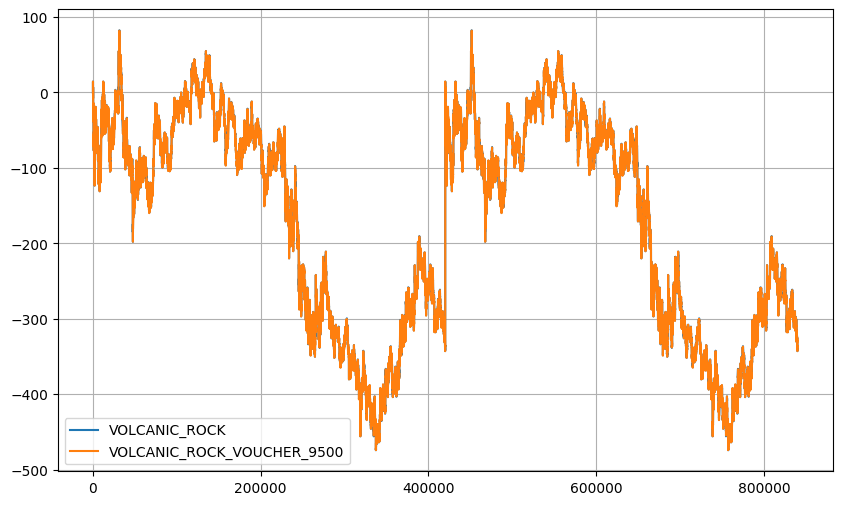

In [56]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
for product in [Products.VOLCANIC_ROCK, Products.VOLCANIC_ROCK_VOUCHER_9500]:
    product_data = data[product]
    d = product_data["mid_price"] - product_data["mid_price"].iloc[0]
    ax1.plot(d , label=product)
    
plt.legend()
plt.grid(True)  # Optionally add a grid
plt.show()

difference between volanic and voucher 9500


In [68]:
data[Products.VOLCANIC_ROCK][["timestamp","mid_price"]].set_index("timestamp").shift(1) - data[Products.VOLCANIC_ROCK_VOUCHER_9500][["timestamp","mid_price"]].set_index("timestamp")

,mid_price
timestamp,
0,NaN
100,9492.5
200,9496.5
300,9495.0
400,9507.5
...,...
999500,9498.5
999600,9500.5
999700,9499.5


# Calculate volatility of underlying

In [33]:
underlying_data = data[Products.VOLCANIC_ROCK]

underlying_data["mid_price_lag_1"] = underlying_data["mid_price"].shift(1)
underlying_data[["mid_price", "mid_price_lag_1"]]

/tmp/ipykernel_32386/765699514.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underlying_data["mid_price_lag_1"] = underlying_data["mid_price"].shift(1)


,mid_price,mid_price_lag_1
13,10503.0,NaN
21,10510.0,10503.0
31,10513.0,10510.0
55,10517.5,10513.0
60,10509.5,10517.5
...,...,...
839936,10168.0,10166.5
839945,10167.0,10168.0
839965,10167.0,10167.0
839984,10167.5,10167.0


In [38]:
underlying_data["interday_returns"]= (underlying_data["mid_price"] / underlying_data["mid_price_lag_1"]) - 1

/tmp/ipykernel_32386/2187223069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underlying_data["interday_returns"]= (underlying_data["mid_price"] / underlying_data["mid_price_lag_1"]) - 1


In [74]:
import math

trading_days = len(underlying_data)

vol = underlying_data["interday_returns"].std()

annualised_vol = math.sqrt(20_000) * vol
annualised_vol


np.float64(0.004515355553948937)

In [162]:
from round_3.trader import VOLCANIC_ROCK


def hv(product):
    underlying_data = data[product]

    underlying_data["mid_price_lag_1"] = underlying_data["mid_price"].shift(1)
    underlying_data[["mid_price", "mid_price_lag_1"]]

    underlying_data["interday_returns"]= (underlying_data["mid_price"].iloc[1:] / underlying_data["mid_price_lag_1"].iloc[1:]) - 1
    vol = underlying_data["interday_returns"].std(ddof=1) * math.sqrt(60_000)

    return vol

(hv(Products.VOLCANIC_ROCK_VOUCHER_10500),
hv(Products.VOLCANIC_ROCK_VOUCHER_10250),
hv(Products.VOLCANIC_ROCK_VOUCHER_10000) ,
hv(Products.VOLCANIC_ROCK_VOUCHER_9750) ,
hv(Products.VOLCANIC_ROCK_VOUCHER_9500),
hv(Products.VOLCANIC_ROCK))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2657088184.py, line 19)

In [153]:

hv(Products.VOLCANIC_ROCK_VOUCHER_10500)

/tmp/ipykernel_32386/1755457080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underlying_data["mid_price_lag_1"] = underlying_data["mid_price"].shift(1)
/tmp/ipykernel_32386/1755457080.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underlying_data["interday_returns"]= (underlying_data["mid_price"].iloc[1:] / underlying_data["mid_price_lag_1"].iloc[1:]) - 1


np.float64(0.1212132556957709)

In [152]:
hv(Products.VOLCANIC_ROCK)

/tmp/ipykernel_32386/1755457080.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underlying_data["mid_price_lag_1"] = underlying_data["mid_price"].shift(1)
/tmp/ipykernel_32386/1755457080.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underlying_data["interday_returns"]= (underlying_data["mid_price"].iloc[1:] / underlying_data["mid_price_lag_1"].iloc[1:]) - 1


np.float64(0.0002844406637329328)

Historical vol of option

# Testing implied volatility

In [117]:
from statistics import NormalDist
import numpy as np

normalDist = NormalDist(0, 1)

def cal_tau(day, timestep, T=7) -> float:
    """Calculate time to maturity

    Args:
        day: Current day
        timestep: Current timestep
        T: Time to maturity.

    Returns:
        _type_: _description_
    """
    return T - ((day - 1) * 750_000 + timestep) * 2e-7


def cal_call(
    S: int, tau: float, K, sigma: float = 0.16, r: float = 0.0
) -> tuple[float, float]:
    """Calculate option price

    Args:
        S (int): current stock price.
        tau (int): time to maturity.
        sigma (float): volatility of the underlying asset.
        r (float): Risk-free interest rate. Defaults to 0.
        K (int): Strike price
    Returns:
        Call price and delta
    """
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * tau) / (sigma * math.sqrt(tau))
    delta = normalDist.cdf(d1)
    d2 = d1 - sigma * np.sqrt(tau)
    call_price = S * delta - K * math.exp(-r * tau) * normalDist.cdf(d2)
    return call_price, delta


def calculate_implied_volatility(
    market_price, S, tau, r=0, K=10000, tol=1e-6, max_iter=100
):
    sigma = 0.16
    diff = cal_call(S, tau, sigma)[0] - market_price

    iter_count = 0
    while np.any(np.abs(diff) > tol) and iter_count < max_iter:
        vega = (cal_call(S, tau, sigma + tol)[0] - cal_call(S, tau, sigma)[0]) / tol
        sigma -= diff / vega
        diff = cal_call(S, tau, sigma)[0] - market_price
        iter_count += 1

    return sigma


In [104]:
underlying_data =data[Products.VOLCANIC_ROCK]
underlying_prc = underlying_data[underlying_data["timestamp"]==0]["mid_price"].iloc[0]

underlying_prc

np.float64(10503.0)

In [108]:
option_data =data[Products.VOLCANIC_ROCK_VOUCHER_10500]
option_prc = option_data[option_data["timestamp"]==0]["mid_price"].iloc[0]

option_prc

np.float64(99.5)

In [134]:
T = 7
day = 3
timestep = 1_112_500

tau = T - ((day - 1) * 750_000 + timestep) * 2e-7
theo, delta = cal_call(
    underlying_prc, tau, K=10_500, sigma=np.float64(0.7844406637329328)
)

iv = calculate_implied_volatility(
    option_prc, underlying_prc, tau, K=10_500
)

iv

np.float64(21331.458069434328)

In [136]:

T = 7
day = 3
timestep = 1_112_500

tau = T - ((day - 1) * 750_000 + timestep) * 2e-7

calculate_implied_volatility(99.5, 10503.0, tau=tau, K=10_500)

21331.458069434328